In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
test_df = pd.read_csv("Travel Company New Clients.csv", sep = ';')

test_df.rename(columns = {"Employment Type": 'EmploymentType'}, inplace = True)
test_df.EmploymentType.replace({'Private Sector/Self Employed': 1, 'Government Sector': 0}, inplace = True)
test_df.GraduateOrNot.replace({'Yes': 1, 'No': 0}, inplace = True)
test_df.FrequentFlyer.replace({'Yes': 1, 'No': 0}, inplace = True)
test_df.EverTravelledAbroad.replace({'Yes': 1, 'No': 0}, inplace = True)

# convert income to thousands
test_df.AnnualIncome = test_df.AnnualIncome / 1000

test_df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,25,1,0,1150.0,4,0,0,0
1,34,1,1,1500.0,4,1,1,1
2,33,1,1,1500.0,3,0,1,1
3,28,1,1,1150.0,3,0,0,0
4,33,0,1,400.0,5,1,0,0


In [3]:
df = pd.read_csv("Travel Company Old Clients.csv", sep = ';')

# make columns numerical for group by
df.rename(columns = {"Employment Type": 'EmploymentType'}, inplace = True)
df.EmploymentType.replace({'Private Sector/Self Employed': 1, 'Government Sector': 0}, inplace = True)
df.GraduateOrNot.replace({'Yes': 1, 'No': 0}, inplace = True)
df.FrequentFlyer.replace({'Yes': 1, 'No': 0}, inplace = True)
df.EverTravelledAbroad.replace({'Yes': 1, 'No': 0}, inplace = True)

# convert income to thousands
df.AnnualIncome = df.AnnualIncome / 1000

df

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400.0,6,1,0,0,0
1,31,1,1,1250.0,7,0,0,0,0
2,34,1,1,500.0,4,1,0,0,1
3,28,1,1,700.0,3,1,0,0,0
4,28,1,1,700.0,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
677,27,1,0,450.0,7,0,0,0,0
678,25,1,1,1700.0,4,0,1,0,1
679,26,0,1,500.0,5,0,0,0,0
680,29,1,1,1100.0,4,1,0,1,1


In [4]:
df.TravelInsurance.value_counts()

0    452
1    230
Name: TravelInsurance, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  682 non-null    int64  
 1   EmploymentType       682 non-null    int64  
 2   GraduateOrNot        682 non-null    int64  
 3   AnnualIncome         682 non-null    float64
 4   FamilyMembers        682 non-null    int64  
 5   ChronicDiseases      682 non-null    int64  
 6   FrequentFlyer        682 non-null    int64  
 7   EverTravelledAbroad  682 non-null    int64  
 8   TravelInsurance      682 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 48.1 KB


In [6]:
df.isna().sum()

Age                    0
EmploymentType         0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [9]:
group = df.groupby('TravelInsurance').mean()
group

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
TravelInsurance,,,,,,,,
0,29.493363,0.690265,0.851770,842.477876,4.761062,0.269912,0.146018,0.070796
1,29.930435,0.834783,0.843478,1154.782609,4.982609,0.300000,0.339130,0.417391


### Visualizing Independent Variables

Below I am going to visually explore the difference in distributions based off of whether or not a customer purchased travel insurance.  This will help us choose which variables to include in our model.

I am only going to explore the independent variables where the difference appears to be great enough between the two groups (purchased travel insurance / did not purchase travel insurance)

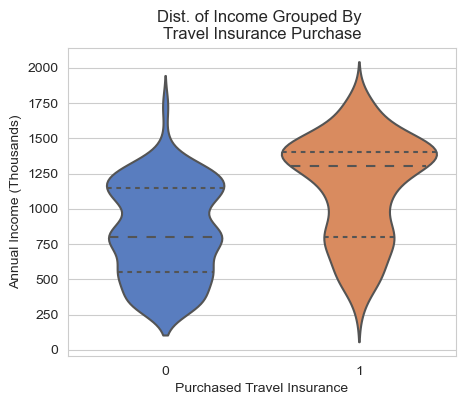

In [10]:
plt.figure(figsize = (5,4))

sns.violinplot(data = df, x = 'TravelInsurance', y = 'AnnualIncome', inner = 'quartile', palette = 'muted')

plt.ylabel("Annual Income (Thousands)")
plt.xlabel("Purchased Travel Insurance")
plt.title("Dist. of Income Grouped By \nTravel Insurance Purchase")

plt.show()

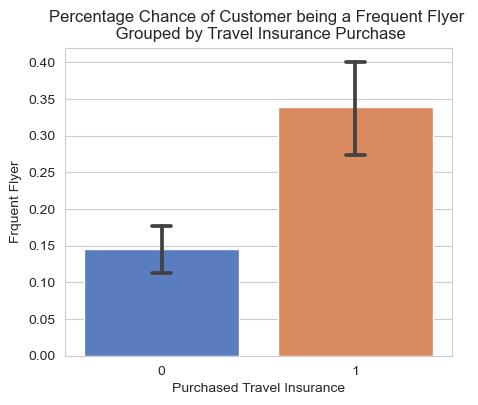

In [11]:
plt.figure(figsize = (5,4))

sns.barplot(data = df, x = 'TravelInsurance', y = 'FrequentFlyer', palette = 'muted',
            capsize = .1)

plt.ylabel("Frquent Flyer")
plt.xlabel("Purchased Travel Insurance")
plt.title("Percentage Chance of Customer being a Frequent Flyer \n Grouped by Travel Insurance Purchase")

plt.show()

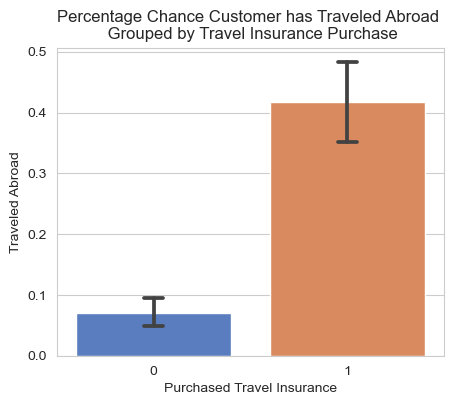

In [12]:
plt.figure(figsize = (5,4))

sns.barplot(data = df, x = 'TravelInsurance', y = 'EverTravelledAbroad', palette = 'muted',
            capsize = .1)

plt.ylabel("Traveled Abroad")
plt.xlabel("Purchased Travel Insurance")
plt.title("Percentage Chance Customer has Traveled Abroad \n Grouped by Travel Insurance Purchase")

plt.show()

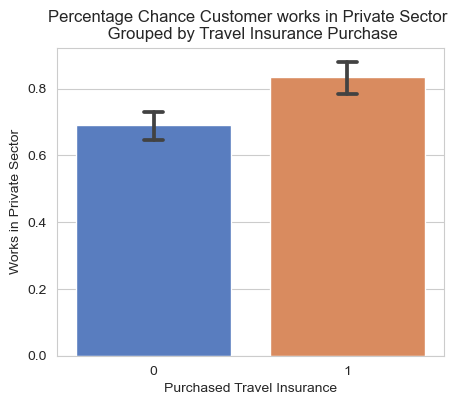

In [13]:
plt.figure(figsize = (5,4))

sns.barplot(data = df, x = 'TravelInsurance', y = 'EmploymentType', palette = 'muted',
            capsize = .1)

plt.ylabel("Works in Private Sector")
plt.xlabel("Purchased Travel Insurance")
plt.title("Percentage Chance Customer works in Private Sector \n Grouped by Travel Insurance Purchase")

plt.show()

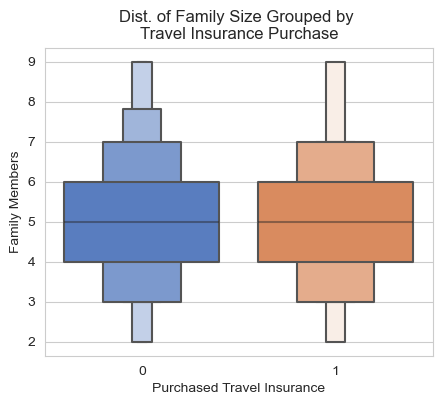

In [14]:
plt.figure(figsize = (5,4))

sns.boxenplot(data = df, x = 'TravelInsurance', y = 'FamilyMembers', palette = 'muted')

plt.ylabel("Family Members")
plt.xlabel("Purchased Travel Insurance")
plt.title("Dist. of Family Size Grouped by \nTravel Insurance Purchase")

plt.show()

From the above visualizations, it appears that there is a significant difference for the "EmploymentType", "TraveledAbroad", "FrequentFlyer", and "AnnualIncome" variables between those who purchased travel insurance and those who didn't.

### Permutation Tests

Permutation tests serve as a useful huerisitc to determine if the difference between the two groups of interest could happen by chance.

In [15]:
def perm_fun(df, col, len_a):
    a = df.sample(n = len_a, replace = False)
    b = df[~df.index.isin(a.index)]
    
    return a[col].mean() - b[col].mean()

In [16]:
def generate_diffs_and_graph(col, len_a, df):
    # generated permuted differences
    actual_diff = group.loc[1][col] - group.loc[0][col]
    diffs = [perm_fun(df, col, len_a) for _ in range(1000)]
    
    # plot permuted differences and actual difference
    plt.figure(figsize = (5,4))
    sns.histplot(diffs)
    plt.axvline(x = actual_diff, color = 'red')
    plt.title(f"Perm Test (statistical significance) for {col}")
    plt.show()

    # calculate and print p-val for statistical significance test
    p_val = [np.abs(diff) > np.abs(actual_diff) for diff in diffs]
    p_val = np.array(p_val).mean()
    print("p-val:", p_val)
    
    return p_val

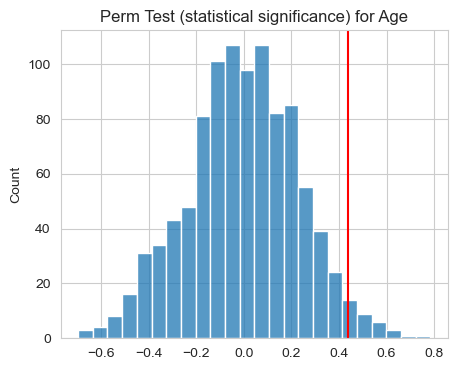

p-val: 0.065


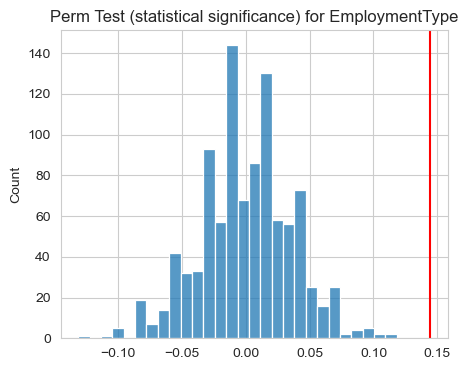

p-val: 0.0


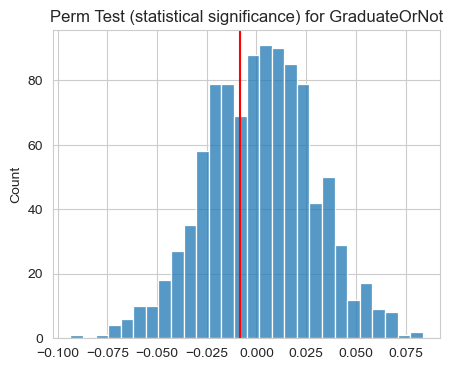

p-val: 0.752


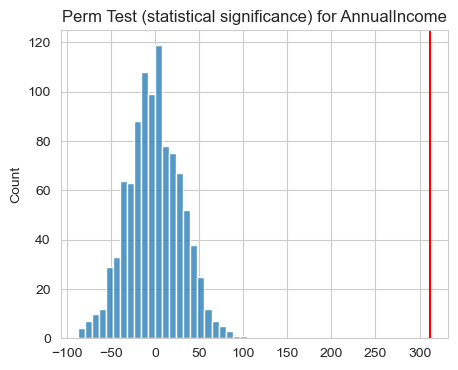

p-val: 0.0


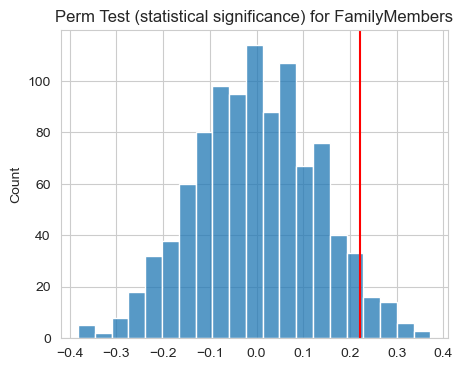

p-val: 0.088


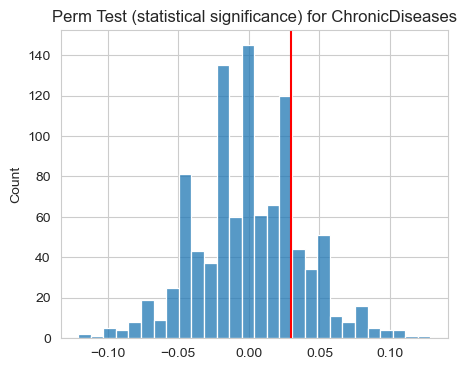

p-val: 0.376


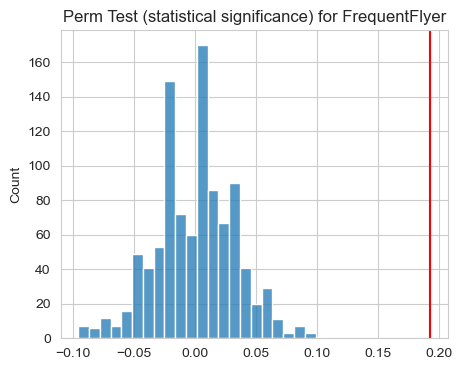

p-val: 0.0


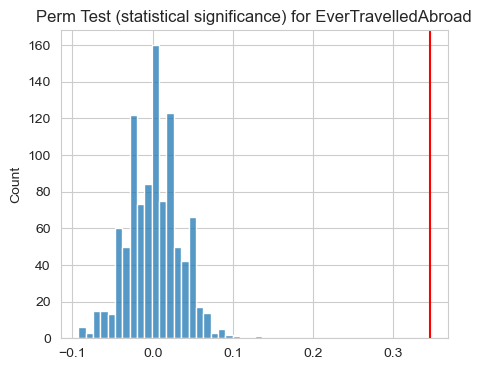

p-val: 0.0


In [17]:
significant_vars = []
len_a = df.TravelInsurance.value_counts().loc[1]

for col in group.columns:
    p_val = generate_diffs_and_graph(col, len_a, df)
    if (p_val <= .05):
        significant_vars.append(col)

In [18]:
significant_vars

['EmploymentType', 'AnnualIncome', 'FrequentFlyer', 'EverTravelledAbroad']

In [19]:
plot_vars = significant_vars.copy()
plot_vars.append('TravelInsurance')
plot_vars

['EmploymentType',
 'AnnualIncome',
 'FrequentFlyer',
 'EverTravelledAbroad',
 'TravelInsurance']

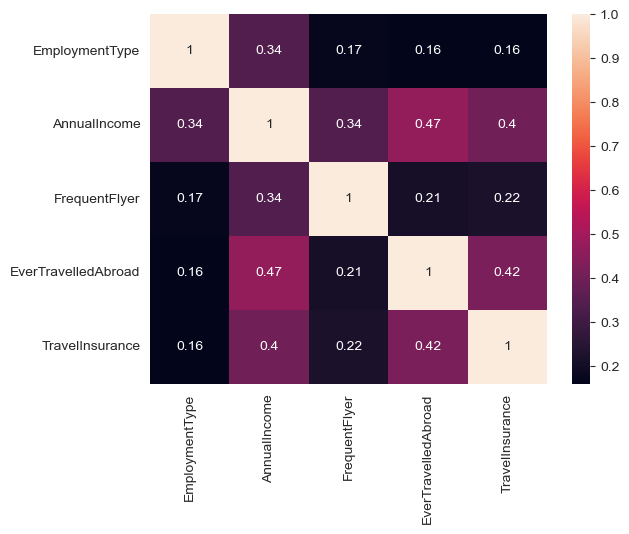

In [20]:
# looking for multicollinearity
plt.figure()
sns.heatmap(df[plot_vars].corr().round(2), annot = True)
plt.show()

### Modeling using NN

In [21]:
predictors = significant_vars.copy()
target = 'TravelInsurance'

X_train = np.array(df[predictors], ndmin = 2)
y_train = np.array(df[target]).reshape(-1,1)

norm_layer = tf.keras.layers.Normalization(axis = -1)
norm_layer.adapt(X_train) # learns mean and variance
X_train_norm = norm_layer(X_train)

In [22]:
X_train_norm

<tf.Tensor: shape=(682, 4), dtype=float32, numpy=
array([[-1.6826947 , -1.4760756 , -0.51735663, -0.48067346],
       [ 0.59428495,  0.81429094, -0.51735663, -0.48067346],
       [ 0.59428495, -1.2066208 , -0.51735663, -0.48067346],
       ...,
       [-1.6826947 , -1.2066208 , -0.51735663, -0.48067346],
       [ 0.59428495,  0.41010857, -0.51735663,  2.0804148 ],
       [ 0.59428495,  0.67956346, -0.51735663, -0.48067346]],
      dtype=float32)>

In [23]:
tf.random.set_seed(1234)

# define model with 3 layers
# 1st layer has 25 neurons and uses relu activation function
# 2nd layer has 15 neurons and uses relu activation function
# output layer has 1 neuron and uses linear activation function


model = Sequential(
    [
        Dense(25, activation = 'relu', name = 'layer_1'),
        Dense(15, activation = 'relu', name = 'layer_2'),
        Dense(1, activation = 'linear', name = 'layer_3')
    ]
)

In [24]:
# define loss

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(0.01)
)

In [25]:
# train model

model.fit(X_train_norm, y_train, epochs = 500)

Epoch 1/500
22/22 [==============================] - 0s 514us/step - loss: 0.5621
Epoch 2/500
22/22 [==============================] - 0s 524us/step - loss: 0.5091
Epoch 3/500
22/22 [==============================] - 0s 455us/step - loss: 0.5093
Epoch 4/500
22/22 [==============================] - 0s 522us/step - loss: 0.4943
Epoch 5/500
22/22 [==============================] - 0s 524us/step - loss: 0.4967
Epoch 6/500
22/22 [==============================] - 0s 513us/step - loss: 0.4933
Epoch 7/500
22/22 [==============================] - 0s 475us/step - loss: 0.4955
Epoch 8/500
22/22 [==============================] - 0s 476us/step - loss: 0.4891
Epoch 9/500
22/22 [==============================] - 0s 476us/step - loss: 0.4902
Epoch 10/500
22/22 [==============================] - 0s 524us/step - loss: 0.4910
Epoch 11/500
22/22 [==============================] - 0s 476us/step - loss: 0.4895
Epoch 12/500
22/22 [==============================] - 0s 476us/step - loss: 0.4949
Epoch 13/500


22/22 [==============================] - 0s 619us/step - loss: 0.4661
Epoch 100/500
22/22 [==============================] - 0s 524us/step - loss: 0.4656
Epoch 101/500
22/22 [==============================] - 0s 524us/step - loss: 0.4654
Epoch 102/500
22/22 [==============================] - 0s 524us/step - loss: 0.4649
Epoch 103/500
22/22 [==============================] - 0s 524us/step - loss: 0.4675
Epoch 104/500
22/22 [==============================] - 0s 476us/step - loss: 0.4663
Epoch 105/500
22/22 [==============================] - 0s 476us/step - loss: 0.4640
Epoch 106/500
22/22 [==============================] - 0s 476us/step - loss: 0.4651
Epoch 107/500
22/22 [==============================] - 0s 476us/step - loss: 0.4706
Epoch 108/500
22/22 [==============================] - 0s 476us/step - loss: 0.4666
Epoch 109/500
22/22 [==============================] - 0s 476us/step - loss: 0.4700
Epoch 110/500
22/22 [==============================] - 0s 524us/step - loss: 0.4767
Epoch 

22/22 [==============================] - 0s 476us/step - loss: 0.4593
Epoch 197/500
22/22 [==============================] - 0s 476us/step - loss: 0.4677
Epoch 198/500
22/22 [==============================] - 0s 476us/step - loss: 0.4594
Epoch 199/500
22/22 [==============================] - 0s 476us/step - loss: 0.4600
Epoch 200/500
22/22 [==============================] - 0s 476us/step - loss: 0.4597
Epoch 201/500
22/22 [==============================] - 0s 524us/step - loss: 0.4585
Epoch 202/500
22/22 [==============================] - 0s 524us/step - loss: 0.4581
Epoch 203/500
22/22 [==============================] - 0s 524us/step - loss: 0.4576
Epoch 204/500
22/22 [==============================] - 0s 476us/step - loss: 0.4576
Epoch 205/500
22/22 [==============================] - 0s 476us/step - loss: 0.4550
Epoch 206/500
22/22 [==============================] - 0s 476us/step - loss: 0.4560
Epoch 207/500
22/22 [==============================] - 0s 476us/step - loss: 0.4575
Epoch 

22/22 [==============================] - 0s 429us/step - loss: 0.4504
Epoch 294/500
22/22 [==============================] - 0s 476us/step - loss: 0.4478
Epoch 295/500
22/22 [==============================] - 0s 476us/step - loss: 0.4537
Epoch 296/500
22/22 [==============================] - 0s 476us/step - loss: 0.4553
Epoch 297/500
22/22 [==============================] - 0s 524us/step - loss: 0.4475
Epoch 298/500
22/22 [==============================] - 0s 524us/step - loss: 0.4530
Epoch 299/500
22/22 [==============================] - 0s 476us/step - loss: 0.4489
Epoch 300/500
22/22 [==============================] - 0s 476us/step - loss: 0.4502
Epoch 301/500
22/22 [==============================] - 0s 476us/step - loss: 0.4491
Epoch 302/500
22/22 [==============================] - 0s 476us/step - loss: 0.4504
Epoch 303/500
22/22 [==============================] - 0s 524us/step - loss: 0.4490
Epoch 304/500
22/22 [==============================] - 0s 524us/step - loss: 0.4479
Epoch 

22/22 [==============================] - 0s 476us/step - loss: 0.4457
Epoch 391/500
22/22 [==============================] - 0s 524us/step - loss: 0.4482
Epoch 392/500
22/22 [==============================] - 0s 476us/step - loss: 0.4496
Epoch 393/500
22/22 [==============================] - 0s 476us/step - loss: 0.4465
Epoch 394/500
22/22 [==============================] - 0s 503us/step - loss: 0.4531
Epoch 395/500
22/22 [==============================] - 0s 478us/step - loss: 0.4497
Epoch 396/500
22/22 [==============================] - 0s 524us/step - loss: 0.4490
Epoch 397/500
22/22 [==============================] - 0s 477us/step - loss: 0.4455
Epoch 398/500
22/22 [==============================] - 0s 529us/step - loss: 0.4466
Epoch 399/500
22/22 [==============================] - 0s 495us/step - loss: 0.4461
Epoch 400/500
22/22 [==============================] - 0s 474us/step - loss: 0.4489
Epoch 401/500
22/22 [==============================] - 0s 476us/step - loss: 0.4488
Epoch 

22/22 [==============================] - 0s 476us/step - loss: 0.4490
Epoch 488/500
22/22 [==============================] - 0s 476us/step - loss: 0.4484
Epoch 489/500
22/22 [==============================] - 0s 524us/step - loss: 0.4479
Epoch 490/500
22/22 [==============================] - 0s 524us/step - loss: 0.4487
Epoch 491/500
22/22 [==============================] - 0s 476us/step - loss: 0.4442
Epoch 492/500
22/22 [==============================] - 0s 476us/step - loss: 0.4504
Epoch 493/500
22/22 [==============================] - 0s 524us/step - loss: 0.4444
Epoch 494/500
22/22 [==============================] - 0s 476us/step - loss: 0.4457
Epoch 495/500
22/22 [==============================] - 0s 476us/step - loss: 0.4457
Epoch 496/500
22/22 [==============================] - 0s 476us/step - loss: 0.4443
Epoch 497/500
22/22 [==============================] - 0s 524us/step - loss: 0.4448
Epoch 498/500
22/22 [==============================] - 0s 524us/step - loss: 0.4436
Epoch 

In [26]:
X_test = np.array(test_df[predictors])
X_test_norm = norm_layer(X_test)

X_test_norm

<tf.Tensor: shape=(1303, 4), dtype=float32, numpy=
array([[ 0.59428495,  0.54483604, -0.51735663, -0.48067346],
       [ 0.59428495,  1.4879282 ,  1.9329021 ,  2.0804148 ],
       [ 0.59428495,  1.4879282 ,  1.9329021 ,  2.0804148 ],
       ...,
       [ 0.59428495,  0.54483604, -0.51735663, -0.48067346],
       [ 0.59428495,  0.14065368,  1.9329021 ,  2.0804148 ],
       [ 0.59428495, -1.2066208 , -0.51735663, -0.48067346]],
      dtype=float32)>

In [27]:
predictions = model.predict(X_test_norm)

41/41 [==============================] - 0s 350us/step


In [28]:
logit = model(X_test_norm)
f_x = tf.nn.sigmoid(logit)
f_x

<tf.Tensor: shape=(1303, 1), dtype=float32, numpy=
array([[0.21190701],
       [0.94327766],
       [0.94327766],
       ...,
       [0.21190701],
       [0.04677002],
       [0.28048858]], dtype=float32)>

In [29]:
test_df['PredProb'] = f_x
test_df['Prediction'] = (test_df.PredProb >= .5).replace({True: 1, False: 0})
test_df

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,PredProb,Prediction
0,25,1,0,1150.0,4,0,0,0,0.211907,0
1,34,1,1,1500.0,4,1,1,1,0.943278,1
2,33,1,1,1500.0,3,0,1,1,0.943278,1
3,28,1,1,1150.0,3,0,0,0,0.211907,0
4,33,0,1,400.0,5,1,0,0,0.070933,0
...,...,...,...,...,...,...,...,...,...,...
1298,33,1,1,1500.0,4,0,1,1,0.943278,1
1299,28,1,1,1750.0,5,1,0,1,0.989994,1
1300,28,1,1,1150.0,6,1,0,0,0.211907,0
1301,34,1,1,1000.0,6,0,1,1,0.046770,0
